In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import norm
import scipy.stats as st
import math 

In [2]:
df = pd.read_csv('ps7_data.csv')
df

,Year,Rate (%)
0,1,2
1,2,4
2,3,7
3,4,12
4,5,6
5,6,5
6,7,8
7,8,14
8,9,10
9,10,2


In [10]:
r = df.iloc[:,1]
r = r.values / 100
r

array([0.02, 0.04, 0.07, 0.12, 0.06, 0.05, 0.08, 0.14, 0.1 , 0.02, 0.03,
       0.02, 0.06, 0.07, 0.09])

In [5]:
norm.ppf(0.99)

2.3263478740408408

In [6]:
norm.cdf(norm.ppf(0.99))

0.99

In [21]:
ro = 0.1

0.5 * (norm.ppf(r) * norm.ppf(r) - 
               ((np.sqrt(1 - ro) * norm.ppf(r) - norm.ppf(pd)) / np.sqrt(ro)) * ((np.sqrt(1 - ro) * norm.ppf(r) - norm.ppf(pd)) / np.sqrt(ro)) 
              )    

array([ 1.39455789, -0.68200863, -3.2010823 , -6.65027286, -2.41540991,
       -1.58026308, -3.9469056 , -7.88553629, -5.34554489,  1.39455789,
        0.29949075,  1.39455789, -2.41540991, -3.2010823 , -4.65994224])

In [43]:
def LL(paras):
    pd = paras[0]
    ro = paras[1]
    return np.sum( 
        0.5 * np.log((1-ro) / ro) + 
        0.5 * (norm.ppf(r) ** 2 - 
               ((np.sqrt(1 - ro) * norm.ppf(r) - norm.ppf(pd)) / np.sqrt(ro)) ** 2 
              )    
    )

In [44]:
#Implement the Maximum Likelihood Method

x0 = (0.03, 0.05) #Initial guess of pd and ro

pd0 = x0[0]
ro0 = x0[1]

print('Initial guess of the (pd, ro) configuration: ', (pd0, ro0))
print('Objective function value for the initial guess: ', LL(x0))
print('************')



res = opt.minimize( lambda x: - LL (x)  , x0, method='trust-constr', options={'disp': True, 'maxiter': 2000})

paras_optimal =  res.x

pd_optimal = paras_optimal[0]
ro_optimal = paras_optimal[1]

print('************')
print('Optimal PD: ', pd_optimal * 100, '%')
print('Optimal ro: ', ro_optimal)
print('Optimal value for the optimal solution : ', LL (paras_optimal))



Initial guess of the (pd, ro) configuration:  (0.03, 0.05)
Objective function value for the initial guess:  11.357183515685495
************
`xtol` termination condition is satisfied.
Number of iterations: 23, function evaluations: 69, CG iterations: 40, optimality: 6.91e-06, constraint violation: 0.00e+00, execution time: 0.11 s.
************
Optimal PD:  6.47887462063505 %
Optimal ro:  0.08594029542618654
Optimal value for the optimal solution :  29.788798281050138


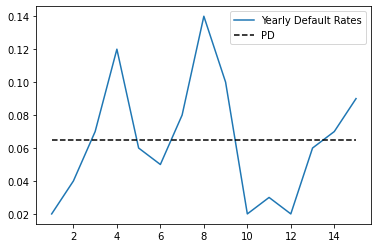

In [45]:
plt.plot(df.iloc[:,0], r , label = 'Yearly Default Rates')
plt.plot(df.iloc[:,0], pd_optimal * np.ones(len(df.iloc[:,0])) , 'k--', label = 'PD' )
plt.legend()
plt.show()

<ipython-input-55-b0068e7c0a8d>:3: RuntimeWarning: invalid value encountered in subtract
  0.5 * ( norm.ppf(x) ** 2 - ((np.sqrt(1 - ro_optimal) * norm.ppf(x) - norm.ppf(pd_optimal)) / np.sqrt(ro_optimal)) ** 2)


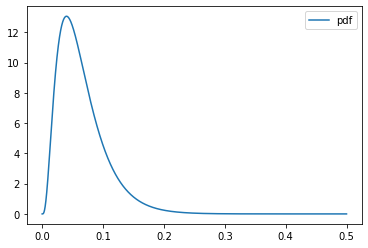

In [55]:
x = np.linspace(0, 0.5, 5000)
y = ( np.sqrt((1-ro_optimal) / ro_optimal) * np.exp(
               0.5 * ( norm.ppf(x) ** 2 - ((np.sqrt(1 - ro_optimal) * norm.ppf(x) - norm.ppf(pd_optimal)) / np.sqrt(ro_optimal)) ** 2) 
               )
    )
plt.plot(x, y , label = 'pdf')
plt.legend()
plt.show()

In [48]:
# 99.9% worst case default rate is

wcdr = norm.cdf(( norm.ppf(pd_optimal) + np.sqrt(ro_optimal) * norm.ppf(0.999)) / np.sqrt(1 - ro_optimal))
wcdr

0.2617771982971884

In [52]:
# Credit VaR CVaR

cvar = wcdr * 10 * ( 1 - 0.4)
# cvar

print('One-year credit VaR is ', cvar ,'million')

One-year credit VaR is  1.5706631897831302 million
